## Loading an example dataset

In [1]:
%matplotlib inline
from sklearn import datasets
iris = datasets.load_iris()

In [2]:
iris.data.shape

(150, 4)

In [3]:
iris.target.shape

(150,)

In [4]:
import numpy as np
np.unique(iris.target)

array([0, 1, 2])

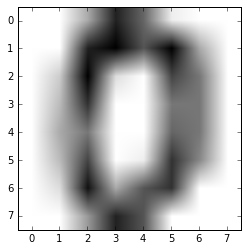

In [5]:
digits = datasets.load_digits()
digits.images.shape
import pylab as pl
pl.imshow(digits.images[0], cmap=pl.cm.gray_r)

In [6]:
data = digits.images.reshape((digits.images.shape[0], -1))

### Learning and Predicting

In [7]:
from sklearn import svm
clf = svm.LinearSVC()
clf.fit(iris.data, iris.target)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [8]:
clf.predict([[5.0, 3.6, 1.3, 0.2]])

array([0])

In [9]:
clf.coef_

array([[ 0.18424162,  0.45122966, -0.80794304, -0.45071748],
       [ 0.05729991, -0.89390604,  0.39853587, -0.93210625],
       [-0.8507056 , -0.98656379,  1.38106741,  1.86538183]])

## Classification

### k-Nearest neighbors classifier

#### Example

In [10]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()
knn.fit(iris.data, iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
knn.predict([[0.1, 0.2, 0.3, 0.4]])

array([0])

#### Training set and testing set

In [12]:
perm = np.random.permutation(iris.target.size)
iris.data = iris.data[perm]
iris.target = iris.target[perm]
knn.fit(iris.data[:100], iris.target[0:100])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
knn.score(iris.data[100:], iris.target[100:])

0.97999999999999998

### Support vector machines (SVMs) for classification

#### Linear Support Vector Machines

In [14]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(iris.data, iris.target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Using kernels

In [15]:
svc = svm.SVC(kernel='poly', degree=3)
svc.fit(iris.data, iris.target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
svc = svm.SVC(kernel='rbf')
svc.fit(iris.data, iris.target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Clustering: grouping observations together

### K-means clustering

In [17]:
from sklearn import cluster, datasets
iris = datasets.load_iris()
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(iris.data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [18]:
print(k_means.labels_[::10])
print(iris.target[::10])

[1 1 1 1 1 0 0 0 0 0 2 2 2 2 2]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


#### Application to Image Compression

In [19]:
from scipy import misc
import pylab as plt

In [20]:
face = misc.face(gray = True).astype(np.float32)
X = face.reshape((-1, 1)) 
K = k_means = cluster.KMeans(n_clusters=5)
k_means.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

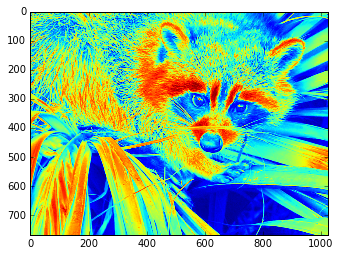

In [21]:
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape
plt.imshow(face)

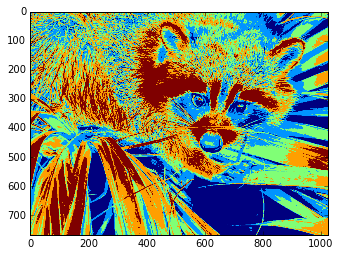

In [22]:
plt.imshow(face_compressed)

## Dimention Reduction with Principal Component Analysis

In [23]:
from sklearn import decomposition

In [24]:
pca = decomposition.PCA(n_components=2)
pca.fit(iris.data)

PCA(copy=True, n_components=2, whiten=False)

In [25]:
X = pca.transform(iris.data)

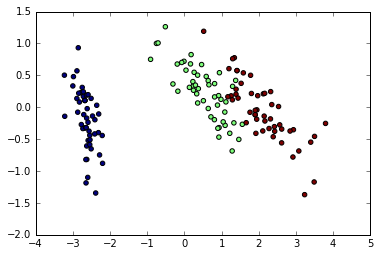

In [26]:
import pylab as pl
pl.scatter(X[:, 0], X[:, -1], c = iris.target)

## Putting it all together: face recognition

In [27]:
import numpy as np
import pylab as pl
from sklearn import cross_validation, datasets, decomposition, svm

In [28]:
lfw_people = datasets.fetch_lfw_people(min_faces_per_person=70, resize=0.4)

C:\Users\Chao\Anaconda3\lib\site-packages\sklearn\externals\joblib\func_inspect.py:191: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  arg_spec = inspect.getargspec(func)


In [29]:
# perm = np.random.permutation(lfw_people.target.size)
# lfw_people.data = lfw_people.data[perm]
# lfw_people.target = lfw_people.target[perm]
# faces = np.reshape(lfw_people.data, (lfw_people.target.shape[0], -1))
# train, test = iter(cross_validation.StratifiedKFold(lfw_people.target)).next()
# X_train, X_test = faces[train], faces[test]
# y_train, y_test = lfw_people.target[train], lfw_people.target[test]

In [30]:
# .. dimension reduction ..
# pca = decomposition.RandomizedPCA(n_components=150, whiten=True)
# pca.fit(X_train)
# X_train_pca = pca.transform(X_train)
# X_test_pca = pca.transform(X_test)

In [31]:
# .. classification ..
# clf = svm.SVC(C=5., gamma=0.001)
# clf.fit(X_train_pca, y_train)

In [32]:
# .. predict on new images ..
# for i in range(10):
# print(lfw_people.target_names[clf.predict(X_test_pca[i])[0]])
# _ = pl.imshow(X_test[i].reshape(50, 37), cmap=pl.cm.gray)
# _ = raw_input()

## Linear model: from regression to sparsity

In [33]:
diabets = datasets.load_diabetes()
diabets_X_train = diabets.data[: -20]
diabets_X_test = diabets.data[-20:]
diabets_y_train = diabets.target[:-20]
diabets_y_test = diabets.target[-20: ]

In [34]:
from sklearn import linear_model
regr = linear_model.Lasso(alpha=.3)
regr.fit(diabets_X_train, diabets_y_train)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
regr.coef_

array([   0.        ,   -0.        ,  497.34075682,  199.17441034,
         -0.        ,   -0.        , -118.89291545,    0.        ,
        430.9379595 ,    0.        ])

In [37]:
regr.score(diabets_X_test, diabets_y_test)

0.55108354530029779

In [39]:
lin = linear_model.LinearRegression()
lin.fit(diabets_X_train, diabets_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
lin.score(diabets_X_test, diabets_y_test)

0.58507530226905735

#### Different algorithms for a same problem

## Model selection: choosing estimators and their parameters

### Grid-search and cross-validated estimators

In [42]:
from sklearn import svm, grid_search
gammas = np.logspace(-6, -1, 10)
svc = svm.SVC()
clf = grid_search.GridSearchCV(estimator=svc, 
                               param_grid=dict(gamma=gammas),
                               n_jobs= -1)
clf.fit(digits.data[:1000], digits.target[:1000])


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'gamma': array([  1.00000e-06,   3.59381e-06,   1.29155e-05,   4.64159e-05,
         1.66810e-04,   5.99484e-04,   2.15443e-03,   7.74264e-03,
         2.78256e-02,   1.00000e-01])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [43]:
clf.best_score_

0.93200000000000005

In [44]:
clf.best_estimator_.gamma

0.00059948425031894088

#### Cross-validated estimators

In [45]:
from sklearn import linear_model, datasets
lasso = linear_model.LassoCV()
diabetes = datasets.load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target
lasso.fit(X_diabetes, y_diabetes)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [46]:
lasso.alpha_

0.012291895087486173

In [47]:
?